
| Ticker      | Nome              | Tipo de dado               | Pode usar na matriz de Markowitz? | Observação importante                     |
|-------------|-------------------|----------------------------|------------------------------------|-------------------------------------------|
| ^BVSP       | IBOVESPA          | Nível do índice (pontos)   | ✅ Sim                             | Já está como “preço” diário               |
| ^GSPC       | S&P 500           | Nível do índice (pontos)   | ✅ Sim                             | Já está como “preço” diário               |
| ^TNX        | Treasury 10Y Yield| Yield (%)                  | ⚠️ Cautela ou evitar               | Não é um preço — é uma taxa de juros      |
| USDBRL=X    | Dólar/Real        | Taxa de câmbio             | ✅ Sim                             | Usar normalmente                          |
| EURBRL=X    | Euro/Real         | Taxa de câmbio             | ✅ Sim                             | Usar normalmente                          |


### IBOVESPA: Um Índice de Mercado

O IBOVESPA é um índice de mercado que representa uma carteira teórica de ações da B3. Ele funciona como um indicador do desempenho médio das ações mais negociadas e representativas do mercado brasileiro.

O “preço” do índice (exemplo: 121.248) pode ser interpretado como o “valor da cota” de uma carteira teórica. Assim como o preço de uma ação, o IBOVESPA flutua diariamente, subindo e descendo conforme as condições do mercado.

### 🔁 O que você precisa para a matriz de retornos?

Para realizar análises financeiras, como a construção de uma matriz de Markowitz, é necessário calcular uma série temporal de retornos logarítmicos. A fórmula para o retorno logarítmico é:

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

Onde:
- \(P_t\): valor do índice no dia \(t\)
- \(r_t\): retorno logarítmico no dia \(t\)

Essa fórmula é aplicável não apenas para índices, mas também para ações, moedas e outros ativos financeiros, desde que você tenha uma sequência numérica coerente no tempo.

A imagem abaixo ilustra como os dados devem ser organizados para calcular os retornos:

```
Data       | Preço
-----------|--------
2023-08-01 | 121248
2023-08-02 | 120859
2023-08-03 | 120586
...
```

Com essa sequência, você pode calcular os retornos diários e utilizá-los em análises financeiras avançadas.


In [163]:
import pandas as pd

In [164]:
try:
    USDBRLX_1d = pd.read_csv('output/USDBRLX_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para USDBRLX_1d")
except FileNotFoundError:
    print("❌ Arquivo USDBRLX_1d.csv não encontrado.")

✅ Dados carregados para USDBRLX_1d


In [165]:
usdbrl = USDBRLX_1d.copy()
usdbrl = usdbrl.reset_index() 
usdbrl.head(5)

,Date,Dólar/Real
0,2023-08-01 00:00:00+01:00,4.7247
1,2023-08-02 00:00:00+01:00,4.7920
2,2023-08-03 00:00:00+01:00,4.8104
3,2023-08-04 00:00:00+01:00,4.9164
4,2023-08-07 00:00:00+01:00,4.8854


In [166]:
usdbrl['Date'] = pd.to_datetime(usdbrl['Date'], utc=True)

# Converte para fuso local (ou remove)
usdbrl['Date'] = usdbrl['Date'].dt.tz_convert(None).dt.date

In [167]:
usdbrl.head(5)

,Date,Dólar/Real
0,2023-07-31,4.7247
1,2023-08-01,4.7920
2,2023-08-02,4.8104
3,2023-08-03,4.9164
4,2023-08-06,4.8854


In [168]:
try:
    EURBRLX_1d = pd.read_csv('output/EURBRLX_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para EURBRLX_1d")
except FileNotFoundError:
    print("❌ Arquivo EURBRLX_1d.csv não encontrado.")

✅ Dados carregados para EURBRLX_1d


In [169]:
eurbrl = EURBRLX_1d.copy()
eurbrl = eurbrl.reset_index() 
eurbrl.head(5)

,Date,Euro/Real
0,2023-08-01 00:00:00+01:00,5.1952
1,2023-08-02 00:00:00+01:00,5.2556
2,2023-08-03 00:00:00+01:00,5.2530
3,2023-08-04 00:00:00+01:00,5.3571
4,2023-08-07 00:00:00+01:00,5.3579


In [170]:
eurbrl['Date'] = pd.to_datetime(eurbrl['Date'], utc=True)

# Converte para fuso local (ou remove)
eurbrl['Date'] = eurbrl['Date'].dt.tz_convert(None).dt.date

In [171]:
eurbrl.head(5)

,Date,Euro/Real
0,2023-07-31,5.1952
1,2023-08-01,5.2556
2,2023-08-02,5.2530
3,2023-08-03,5.3571
4,2023-08-06,5.3579


In [172]:
try:
    BVSP_1d = pd.read_csv('output/^BVSP_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para BVSP_1d")
except FileNotFoundError:
    print("❌ Arquivo BVSP_1d.csv não encontrado.")

✅ Dados carregados para BVSP_1d


In [173]:
ibov = BVSP_1d.copy()
ibov = ibov.reset_index() 
ibov.head(5)

,Date,IBOVESPA
0,2023-08-01 00:00:00-03:00,121248.0
1,2023-08-02 00:00:00-03:00,120859.0
2,2023-08-03 00:00:00-03:00,120586.0
3,2023-08-04 00:00:00-03:00,119508.0
4,2023-08-07 00:00:00-03:00,119380.0


In [174]:
ibov['Date'] = pd.to_datetime(ibov['Date'], utc=True)

# Converte para fuso local (ou remove)
ibov['Date'] = ibov['Date'].dt.tz_convert(None).dt.date

In [175]:
ibov.head(5)

,Date,IBOVESPA
0,2023-08-01,121248.0
1,2023-08-02,120859.0
2,2023-08-03,120586.0
3,2023-08-04,119508.0
4,2023-08-07,119380.0


In [176]:
try:
    GSPC_1d = pd.read_csv('output/^GSPC_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para GSPC_1d")
except FileNotFoundError:
    print("❌ Arquivo GSPC_1d.csv não encontrado.")

✅ Dados carregados para GSPC_1d


In [177]:
sep = GSPC_1d.copy()
sep = sep.reset_index() 
sep.head(5)

,Date,S&P 500
0,2023-08-02 00:00:00-04:00,4513.390137
1,2023-08-03 00:00:00-04:00,4501.890137
2,2023-08-04 00:00:00-04:00,4478.029785
3,2023-08-07 00:00:00-04:00,4518.439941
4,2023-08-08 00:00:00-04:00,4499.379883


In [178]:
# Força a conversão para datetime, tratando timezone corretamente
sep['Date'] = pd.to_datetime(sep['Date'], utc=True)

# Converte para fuso local (ou remove)
sep['Date'] = sep['Date'].dt.tz_convert(None).dt.date


In [179]:
sep.head(5)

,Date,S&P 500
0,2023-08-02,4513.390137
1,2023-08-03,4501.890137
2,2023-08-04,4478.029785
3,2023-08-07,4518.439941
4,2023-08-08,4499.379883


In [180]:
try:
    TNX_1d = pd.read_csv('output/^TNX_1d.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para TNX_1d")
except FileNotFoundError:
    print("❌ Arquivo TNX_1d.csv não encontrado.")

✅ Dados carregados para TNX_1d


In [181]:
TNX_1d.head(5)

,Treasury 10Y Yield
Date,
2023-08-01 00:00:00-05:00,4.051
2023-08-02 00:00:00-05:00,4.078
2023-08-03 00:00:00-05:00,4.189
2023-08-04 00:00:00-05:00,4.060
2023-08-07 00:00:00-05:00,4.078


In [182]:
try:
    CDI_SGS_12 = pd.read_csv('output\CDI_SGS_12.csv', index_col=0, parse_dates=True)
    print("✅ Dados carregados para CDI_SGS_12")
except FileNotFoundError:
    print("❌ Arquivo CDI_SGS_12.csv não encontrado.")

✅ Dados carregados para CDI_SGS_12


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\gabriel\AppData\Local\Temp\ipykernel_35104\2491463821.py:2: SyntaxWarning: invalid escape sequence '\C'
  CDI_SGS_12 = pd.read_csv('output\CDI_SGS_12.csv', index_col=0, parse_dates=True)


In [183]:
cdi = CDI_SGS_12.copy()
cdi = cdi.reset_index() 
cdi.head(5)

,Date,CDI
0,2024-08-01,0.03927
1,2024-08-02,0.03927
2,2024-08-05,0.03927
3,2024-08-06,0.03927
4,2024-08-07,0.03927


In [184]:
# Converter 'Date' para índice comum
ibov.set_index('Date', inplace=True)
eurbrl.set_index('Date', inplace=True)
usdbrl.set_index('Date', inplace=True)
sep.set_index('Date', inplace=True)

# Concatenar ao longo das colunas
df_concat = pd.concat([ibov, sep, eurbrl, usdbrl], axis=1).dropna().reset_index()


In [185]:
df_concat.head(5)

,Date,IBOVESPA,S&P 500,Euro/Real,Dólar/Real
0,2023-08-02,120859.0,4513.390137,5.2530,4.8104
1,2023-08-03,120586.0,4501.890137,5.3571,4.9164
2,2023-08-07,119380.0,4518.439941,5.3825,4.8990
3,2023-08-08,119090.0,4499.379883,5.3615,4.8986
4,2023-08-09,118409.0,4467.709961,5.3787,4.9017


In [186]:
cdi['CDI'] = cdi['CDI'] / 100  # transforma de % para decimal, se necessário

# Calcular o fator acumulado (como se R$1 estivesse rendendo CDI)
cdi['CDI_acumulado'] = (1 + cdi['CDI']).cumprod()

In [187]:
cdi.head(5)


,Date,CDI,CDI_acumulado
0,2024-08-01,0.000393,1.000393
1,2024-08-02,0.000393,1.000786
2,2024-08-05,0.000393,1.001179
3,2024-08-06,0.000393,1.001572
4,2024-08-07,0.000393,1.001965


### Matriz de Markwitz


In [188]:
!pip install PyPortfolioOpt
import numpy as np
from pypfopt import EfficientFrontier, expected_returns, risk_models
from pypfopt.plotting import plot_weights
import seaborn as sns
import matplotlib.pyplot as plt

#### CALCULAR RETORNOS E MATRIZ DE COVARIÂNCIA

In [189]:
precos = df_concat.drop(columns='Date')
retornos = np.log(precos / precos.shift(1)).dropna()

In [190]:
mu = expected_returns.mean_historical_return(precos)
S = risk_models.sample_cov(precos)

#### Limites baseados no Case Safra

In [191]:
limites_maximos = {
    'IBOVESPA': 0.25,       # IBOVESPA + AÇÕES IBRX = 25%
    'S&P 500': 0.20,        # S&P = 20%
    'Euro/Real': 0.30,      # EURO = 30%
    'Dólar/Real': 0.30      # US$ = 30%
}

In [192]:
# Criar uma lista com os limites máximos na ordem das colunas
colunas = precos.columns
bounds = [(0, limites_maximos.get(col, 1.0)) for col in colunas]  # padrão 100% se não especificado


In [193]:

# === 3. OTIMIZAÇÃO COM RESTRIÇÕES ===
ef = EfficientFrontier(mu, S, weight_bounds=bounds)
ef.max_sharpe()
pesos_otimizados = ef.clean_weights()
print("Pesos ótimos com restrições:\n", pesos_otimizados)

Pesos ótimos com restrições:
 OrderedDict({'IBOVESPA': 0.25, 'S&P 500': 0.2, 'Euro/Real': 0.3, 'Dólar/Real': 0.25})


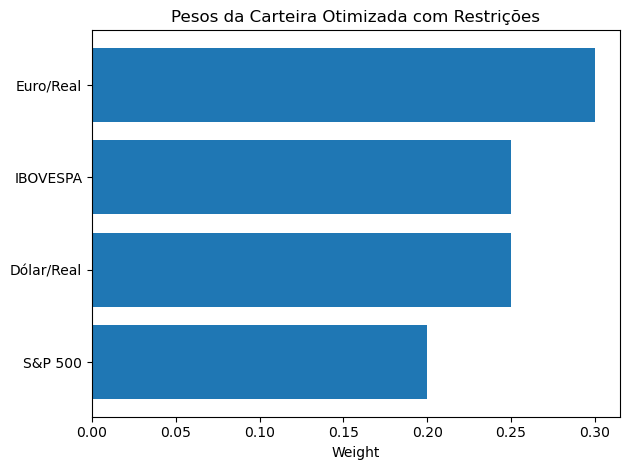

In [194]:
# === 4. GRÁFICO DE BARRAS ===
plot_weights(pesos_otimizados)
plt.title("Pesos da Carteira Otimizada com Restrições")
plt.tight_layout()
plt.show()

In [195]:
# === 5. BACKTEST DA CARTEIRA ===
# Calcular retorno diário da carteira
pesos_lista = [pesos_otimizados[ativo] for ativo in precos.columns]
retorno_carteira = (retornos * pesos_lista).sum(axis=1)


In [196]:

# Acumular o retorno para simular crescimento de R$1
retorno_carteira.index = retornos.index
carteira_acumulada = (1 + retorno_carteira).cumprod()
print(carteira_acumulada)

1      1.010261
2      1.009001
3      1.006331
4      1.004593
5      1.002782
         ...   
420    1.205122
421    1.205472
422    1.203048
423    1.202022
424    1.200759
Length: 424, dtype: float64


In [197]:
print("Carteira acumulada - index:")
print(carteira_acumulada.index[:5])

print("CDI - index:")
print(cdi['Date'].head())


Carteira acumulada - index:
Index([1, 2, 3, 4, 5], dtype='int64')
CDI - index:
0   2024-08-01
1   2024-08-02
2   2024-08-05
3   2024-08-06
4   2024-08-07
Name: Date, dtype: datetime64[ns]


In [198]:
df_backtest = pd.DataFrame({'Carteira': carteira_acumulada})
df_backtest = df_backtest.merge(cdi[['CDI_acumulado']], left_index=True, right_index=True, how='inner')
df_backtest.rename(columns={'CDI_acumulado': 'CDI'}, inplace=True)

In [199]:
df_backtest.head(5)

,Carteira,CDI
1,1.010261,1.000786
2,1.009001,1.001179
3,1.006331,1.001572
4,1.004593,1.001965
5,1.002782,1.002359


In [210]:
retorno_anual_carteira = (df_backtest['Carteira'].iloc[-1])**(252/len(df_backtest)) - 1
retorno_anual_cdi = (df_backtest['CDI'].iloc[-1])**(252/len(df_backtest)) - 1

print(f"Retorno Anualizado da Carteira: {retorno_anual_carteira:.2%}")
print(f"Retorno Anualizado do CDI: {retorno_anual_cdi:.2%}")


Retorno Anualizado da Carteira: 16.19%
Retorno Anualizado do CDI: 12.66%


In [211]:
import statsmodels.api as sm

# Retornos diários
ret_carteira = df_backtest['Carteira'].pct_change().dropna()
ret_cdi = df_backtest['CDI'].pct_change().dropna()

# Alinhar índices
ret_carteira, ret_cdi = ret_carteira.align(ret_cdi, join='inner')

# Regressão linear: carteira ~ CDI
X = sm.add_constant(ret_cdi)
model = sm.OLS(ret_carteira, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Carteira   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.017
Date:                Fri, 01 Aug 2025   Prob (F-statistic):              0.314
Time:                        18:21:00   Log-Likelihood:                 1014.5
No. Observations:                 249   AIC:                            -2025.
Df Residuals:                     247   BIC:                            -2018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0015      0.002     -0.728      0.4

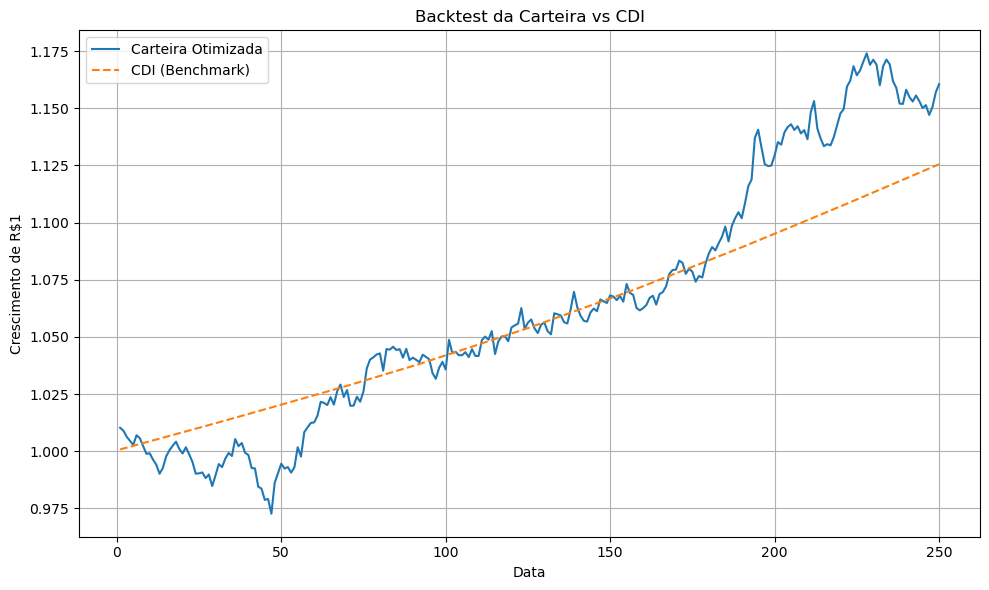

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df_backtest.index, df_backtest['Carteira'], label='Carteira Otimizada')
plt.plot(df_backtest.index, df_backtest['CDI'], label='CDI (Benchmark)', linestyle='--')
plt.title('Backtest da Carteira vs CDI')
plt.xlabel('Data')
plt.ylabel('Crescimento de R$1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


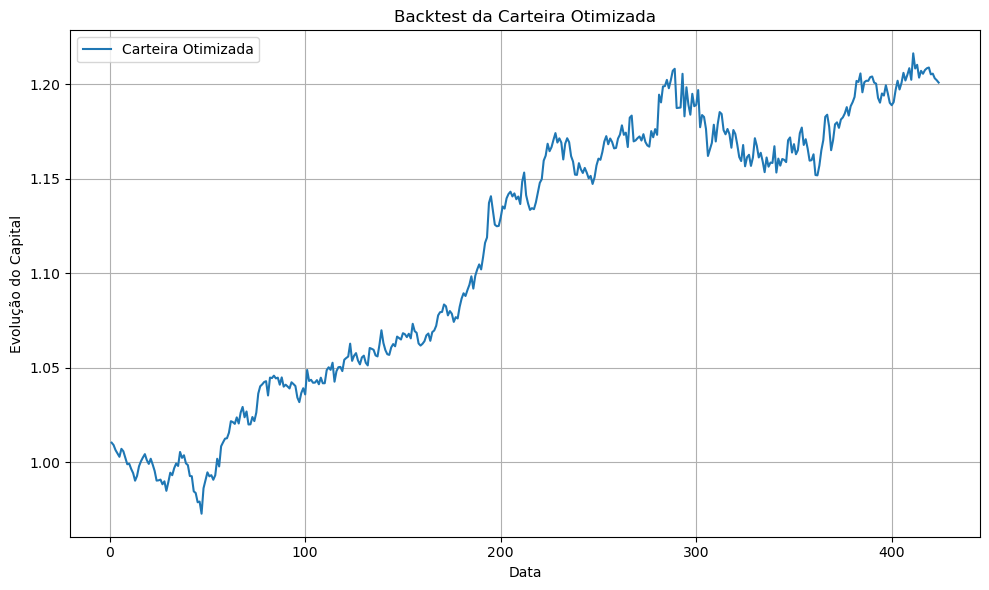

In [201]:
# Plotar
plt.figure(figsize=(10,6))
carteira_acumulada.plot(label='Carteira Otimizada')
plt.title("Backtest da Carteira Otimizada")
plt.ylabel("Evolução do Capital")
plt.xlabel("Data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [202]:
media_retornos = retornos.mean() * 252  # Retorno médio diário, e o PyPortfolioOpt interpreta ele como anual.
matriz_cov = retornos.cov()
matriz_corr = retornos.corr()

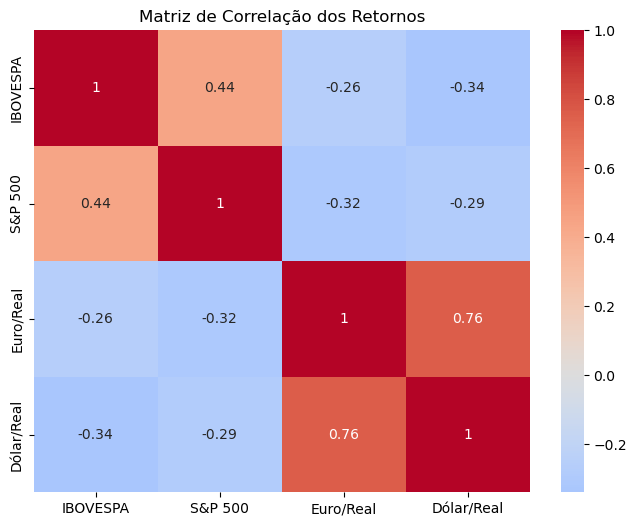

In [203]:


plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação dos Retornos")
plt.show()


In [204]:
# Inicializa a fronteira eficiente
ef = EfficientFrontier(media_retornos, matriz_cov)

In [205]:
# Otimiza a carteira para máximo Sharpe Ratio
pesos = ef.max_sharpe()

In [206]:
# Exibe os pesos calculados
limpos = ef.clean_weights()
print("Pesos ótimos:\n", limpos)

# Desempenho estimado da carteira
ret, vol, sharpe = ef.portfolio_performance(verbose=True)

Pesos ótimos:
 OrderedDict({'IBOVESPA': 0.01238, 'S&P 500': 0.4876, 'Euro/Real': 0.46821, 'Dólar/Real': 0.03182})
Expected annual return: 15.8%
Annual volatility: 0.6%
Sharpe Ratio: 27.46


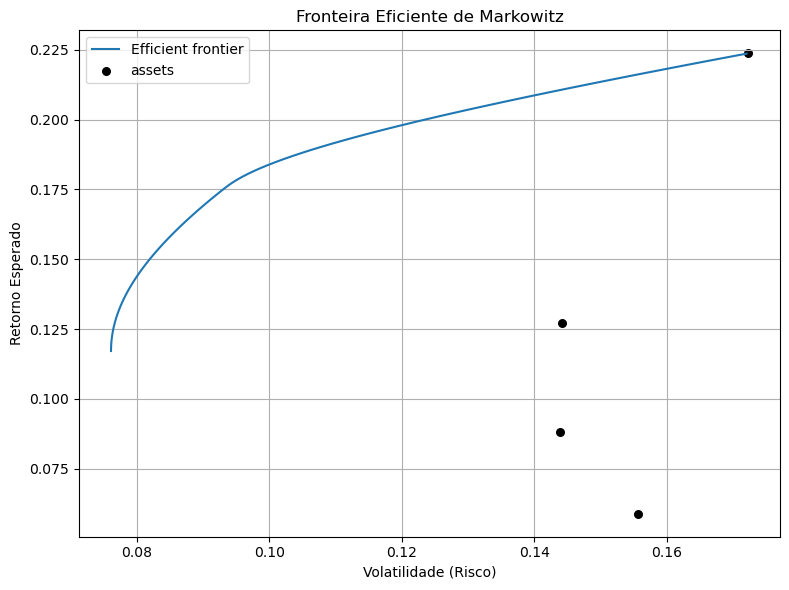

In [207]:
from pypfopt import EfficientFrontier, expected_returns, risk_models
from pypfopt.plotting import plot_efficient_frontier
import matplotlib.pyplot as plt

# Supondo que 'precos' já está definido corretamente
mu = expected_returns.mean_historical_return(precos)
S = risk_models.sample_cov(precos)

ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots(figsize=(8,6))
plot_efficient_frontier(ef, ax=ax, show_assets=True)

plt.title("Fronteira Eficiente de Markowitz")
plt.xlabel("Volatilidade (Risco)")
plt.ylabel("Retorno Esperado")
plt.grid(True)
plt.tight_layout()
plt.show()


In [208]:
from pypfopt.plotting import plot_efficient_frontier, plot_weights

ret, vol, sharpe = ef.portfolio_performance()
ax.scatter(vol, ret, marker="*", s=100, c="r", label="Máx. Sharpe")

In [209]:
pesos_otimos = ef.clean_weights()
print(pesos_otimos)


OrderedDict({'IBOVESPA': 0.0, 'S&P 500': 0.9989, 'Euro/Real': 0.00112, 'Dólar/Real': 0.0})
